In [1]:
!pip install fredapi

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import time

plt.style.use('fivethirtyeight')
pd.options.display.max_columns = 500 # pd.set_option('max_columns', 500)
color_pal = plt.rcParams["axes.prop_cycle"].by_key()["color"]

from fredapi import Fred

fred_key = 'https://api.stlouisfed.org/fred/series?series_id=GNPCA&api_key=5b63d4b0353c09155804dd8f062e1b83'

#from kaggle_secrets import UserSecretsClient
#secrets = UserSecretsClient()
#fred_key = secrets.get_secret('fred-api')



## 1. Create The Fred Object

In [3]:
fred = Fred(api_key=fred_key)

## 2.Search Economic Data!

In [4]:
sp_search = fred.search('S&P',order_by='popularity')

In [5]:
sp_search.shape

(1000, 15)

 # 3. Pull Raw Data & Plot

In [6]:
sp500 = fred.get_series(series_id='SP500')

<AxesSubplot:title={'center':'S&P500'}>

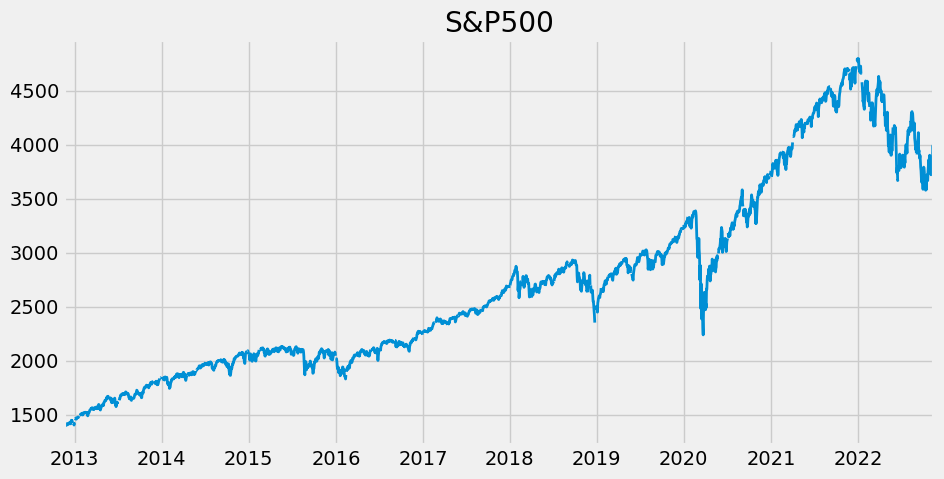

In [7]:
sp500.plot(figsize=(10,5),title='S&P500',lw=2)

# 4. Pull and Join Multiple Data Series

In [8]:
uemp_results = fred.search('unemployment')

In [9]:
unrate = fred.get_series('UNRATE')

<AxesSubplot:>

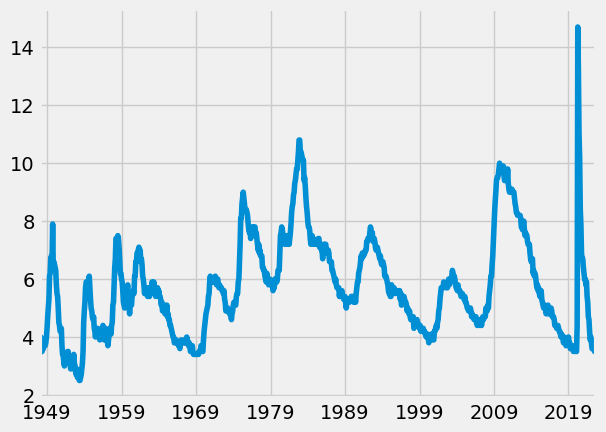

In [10]:
unrate.plot()

In [11]:
unemp_df = fred.search('unemployment rate state',filter =('frequency','Monthly'))

In [12]:
unemp_df

id realtime_start realtime_end  \
series id                                              
UNRATE            UNRATE     2022-11-18   2022-11-18   
UNRATENSA      UNRATENSA     2022-11-18   2022-11-18   
UNEMPLOY        UNEMPLOY     2022-11-18   2022-11-18   
LNS14000006  LNS14000006     2022-11-18   2022-11-18   
U6RATE            U6RATE     2022-11-18   2022-11-18   
...                  ...            ...          ...   
VAPITT0URN    VAPITT0URN     2022-11-18   2022-11-18   
SCCHES5URN    SCCHES5URN     2022-11-18   2022-11-18   
MNWRIG0URN    MNWRIG0URN     2022-11-18   2022-11-18   
PAINDI0URN    PAINDI0URN     2022-11-18   2022-11-18   
OKCART9URN    OKCART9URN     2022-11-18   2022-11-18   

                                                         title  \
series id                                                        
UNRATE                                       Unemployment Rate   
UNRATENSA                                    Unemployment Rate   
UNEMPLOY                                    Unemployment Level   
LNS14000006      Unemployment Rate - Black or African American   
U6RATE       Total Unemployed, Plus All Persons Marginally ...   
...                                                        ...   
VAPITT0URN        Unemployment Rate in Pittsylvania County, VA   
SCCHES5URN        Unemployment Rate in Chesterfield County, SC   
MNWRIG0URN              Unemployment Rate in Wright County, MN   
PAINDI0URN             Unemployment Rate in Indiana County, PA   
OKCART9URN              Unemployment Rate in Carter County, OK   

            observation_start observation_end frequency frequency_short  \
series id                                                                 
UNRATE             1948-01-01      2022-10-01   Monthly               M   
UNRATENSA          1948-01-01      2022-10-01   Monthly               M   
UNEMPLOY           1948-01-01      2022-10-01   Monthly               M   
LNS14000006        1972-01-01      2022-10-01   Monthly               M   
U6RATE             1994-01-01      2022-10-01   Monthly               M   
...                       ...             ...       ...             ...   
VAPITT0URN         1990-01-01      2022-09-01   Monthly               M   
SCCHES5URN         1990-01-01      2022-09-01   Monthly               M   
MNWRIG0URN         1990-01-01      2022-09-01   Monthly               M   
PAINDI0URN         1990-01-01      2022-09-01   Monthly               M   
OKCART9URN         1990-01-01      2022-09-01   Monthly               M   

                            units        units_short      seasonal_adjustment  \
series id                                                                       
UNRATE                    Percent                  %      Seasonally Adjusted   
UNRATENSA                 Percent                  %  Not Seasonally Adjusted   
UNEMPLOY     Thousands of Persons  Thous. of Persons      Seasonally Adjusted   
LNS14000006               Percent                  %      Seasonally Adjusted   
U6RATE                    Percent                  %      Seasonally Adjusted   
...                           ...                ...                      ...   
VAPITT0URN                Percent                  %  Not Seasonally Adjusted   
SCCHES5URN                Percent                  %  Not Seasonally Adjusted   
MNWRIG0URN                Percent                  %  Not Seasonally Adjusted   
PAINDI0URN                Percent                  %  Not Seasonally Adjusted   
OKCART9URN                Percent                  %  Not Seasonally Adjusted   

            seasonal_adjustment_short               last_updated popularity  \
series id                                                                     
UNRATE                             SA  2022-11-04 07:44:03-05:00         94   
UNRATENSA                         NSA  2022-11-04 07:43:03-05:00         58   
UNEMPLOY                           SA  2022-11-04 07:44:06-05:00         69   
LNS140000

In [13]:
unemp_df = fred.search('unemployment rate state', filter=('frequency','Monthly'))
unemp_df = unemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
unemp_df = unemp_df.loc[unemp_df['title'].str.contains('Unemployment Rate')]

In [14]:
all_results = []
for myid in unemp_df.index:
    results= fred.get_series(myid)
    results.to_frame(name=myid)
    all_results.append(results)



In [15]:
uemp_results = pd.concat(all_results,axis=1)

In [16]:
uemp_states = uemp_results.drop(0,axis=1)

In [19]:
uemp_states.dropna()

Empty DataFrame
Columns: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98]
Index: []

In [20]:
px.line(uemp_states)

# Pull April 2020 Unemployment Rate Per State

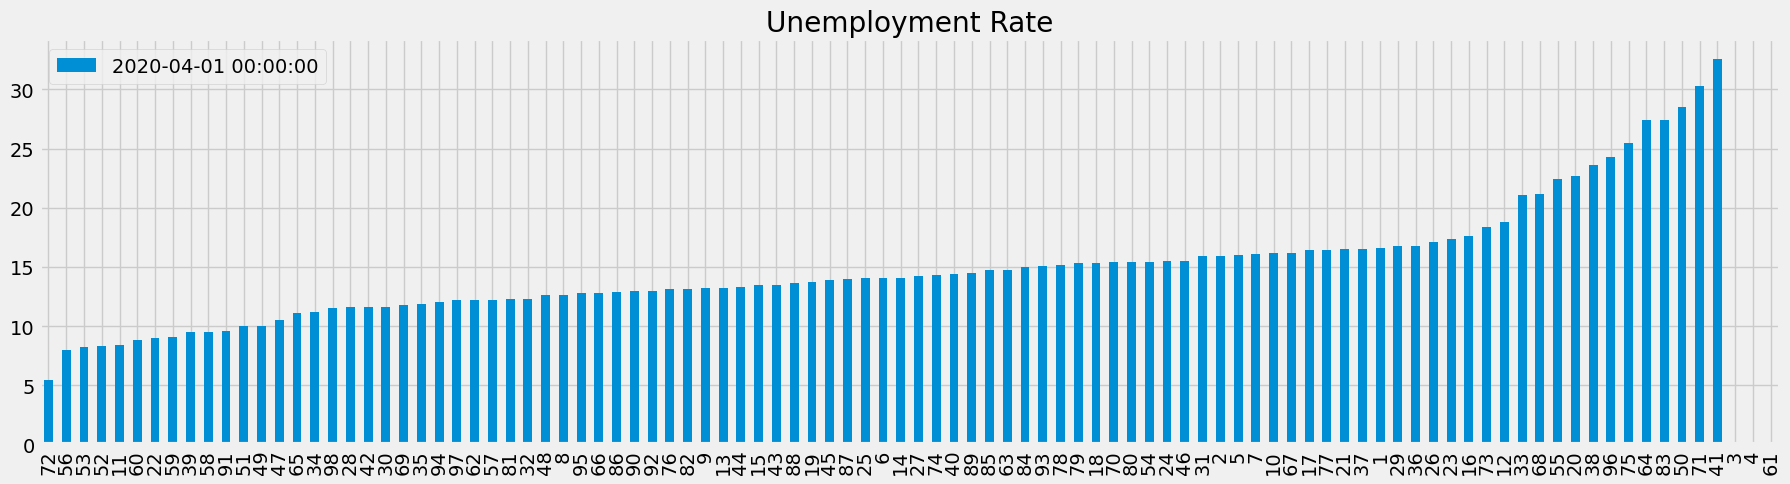

In [26]:
uemp_states.loc[uemp_states.index == '2020-04-01'].T\
    .sort_values('2020-04-01')\
        .plot(kind='bar',figsize=(20,5),title='Unemployment Rate');

In [30]:
id_to_state = unemp_df['title'].str.replace('Unemployment Rate in', ' ').to_dict()

In [33]:
uemp_states.columns

RangeIndex(start=1, stop=99, step=1)

In [34]:
id_to_state

{'UNRATE': 'Unemployment Rate',
 'LNS14000006': 'Unemployment Rate - Black or African American',
 'CAUR': '  California',
 'M0892AUSM156SNBR': 'Unemployment Rate for United States',
 'M0892BUSM156SNBR': 'Unemployment Rate for United States',
 'LNS14000031': 'Unemployment Rate - 20 Yrs. & over, Black or African American Men',
 'LNS14000024': 'Unemployment Rate - 20 Yrs. & over',
 'LNS14000002': 'Unemployment Rate - Women',
 'TXUR': '  Texas',
 'FLUR': '  Florida',
 'NYUR': '  New York',
 'LNS14027662': "Unemployment Rate - Bachelor's Degree and Higher, 25 Yrs. & over",
 'LNS14000009': 'Unemployment Rate - Hispanic or Latino',
 'U2RATE': 'Unemployment Rate - Job Losers (U-2)',
 'LNS14000003': 'Unemployment Rate - White',
 'LNS14000001': 'Unemployment Rate - Men',
 'LNS14027660': 'Unemployment Rate - High School Graduates, No College, 25 Yrs. & over',
 'OHUR': '  Ohio',
 'LRUN64TTUSM156S': 'Unemployment Rate: Aged 15-64: All Persons for the United States',
 'ALUR': '  Alabama',
 'MIUR': '